In [1]:
# This lets us refresh changes from other .py files without having to restart the notebook
%load_ext autoreload
%autoreload 2

In [2]:
from dataReader import getDataset
from audioDataset import AudioDataset
from utils import *
import os
from scipy.io import wavfile
from scipy.signal import stft

In [5]:

# audioDataset = AudioDataset('IRMAS')
# audioDataset = AudioDataset('good-sounds', instruments=['bas', 'cel'], useGeneralInstruments=True)
audioDataset = AudioDataset('nsynth-valid', instruments=['keyboard', 'brass'], kwargs={'nsynth_getAcousticOnly':False})
# @ 10.6 GB usage


In [6]:
data = audioDataset.getAudioData()

print(data.keys())
print([len(val) for val in data.values()])

dict_keys(['brass', 'keyboard'])
[886, 2404]


In [4]:

print(audioDataset.getSpectrogramKwargs())
audioDataset.createSpectrogramsIndependent(deleteAudioData=True)
# @ 17.1 GB IRMAS

{'window': 'hann', 'nperseg': 1024, 'noverlap': 768}


c:\Users\Nicholas\Documents\Desktop\SCHOOL\GRADUATE Offline\CS 545\Final Project\CS545-Final-Project\audioDataset.py:356: RuntimeWarning: divide by zero encountered in log
  


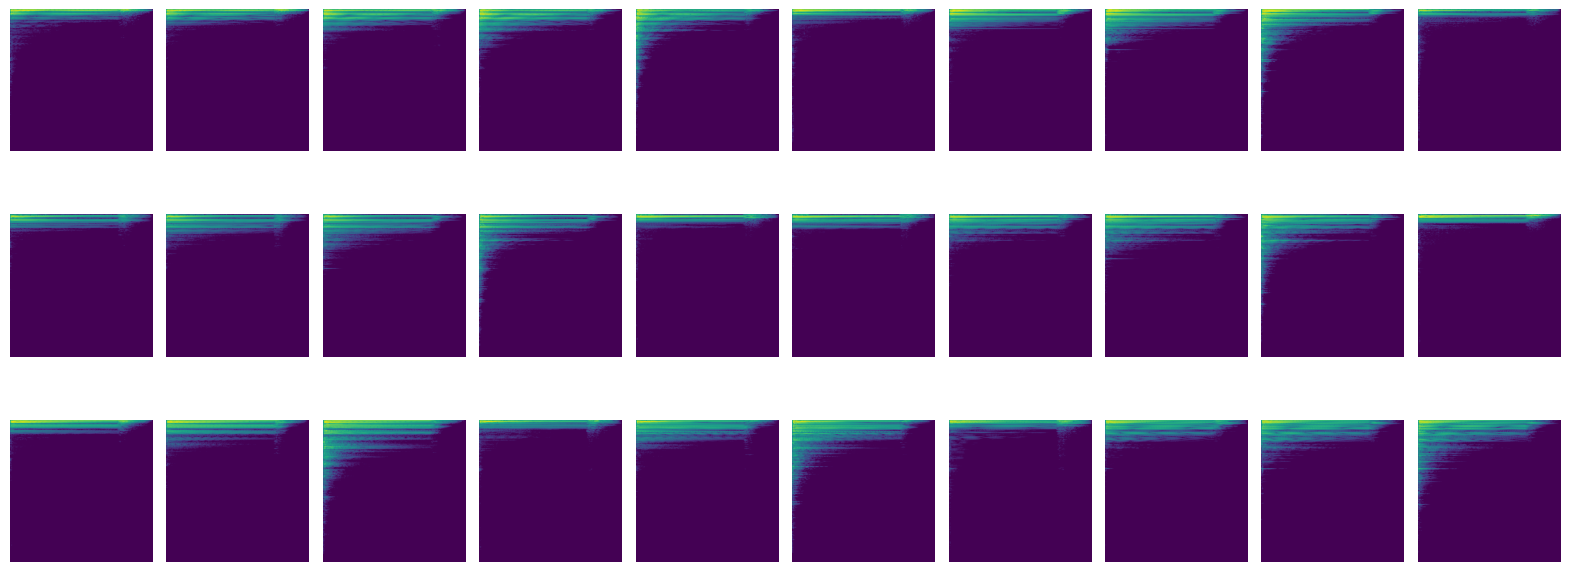

In [5]:

spectrograms = audioDataset.getSpectrograms()
phases = audioDataset.getPhases()

# plt.figure(figsize=(1, 10)), plt.imshow(spectrograms['bas'][-1]), plt.show()
# plt.figure(figsize=(1, 10)), plt.imshow(phases['bas'][-1]), plt.show()

displayImageGrid2(spectrograms['keyboard'], 3, 10, figsize=(20, 8))

# plt.figure(figsize=(10, 10))
# plt.imshow(spectrograms['clarinet_pablo_attack'][0])
# plt.show()
# displayImageGrid2(spectrograms['clarinet_pablo_attack'], 3, 10, figsize=(20, 8))

c:\Users\Nicholas\Documents\GRADUATE OFFLINE\CS 545\CS545-Final-Project\audioDataset.py:254: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(spec)), a_min=0, a_max=np.inf).astype(np.float32)


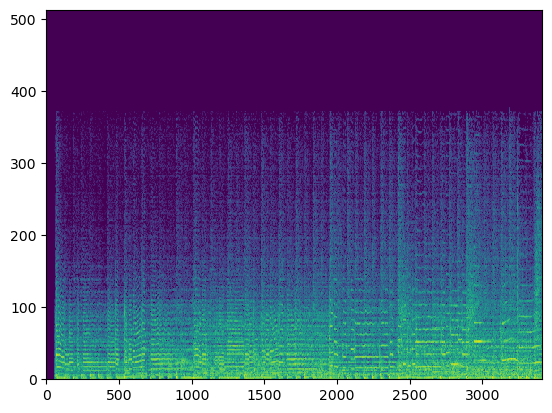

(array([[13.350542 , 14.409454 , 14.844434 , ..., 14.020729 , 12.520918 ,
         11.74039  ],
        [13.144815 , 13.981332 , 14.258148 , ..., 13.544409 , 13.07048  ,
         12.073255 ],
        [12.457023 , 12.323096 , 11.649801 , ..., 11.1340885, 12.877216 ,
         12.30582  ],
        ...,
        [ 5.2462234,  5.047051 ,  5.0779376, ...,  4.381901 ,  7.3958664,
          7.5585966],
        [ 5.2140436,  4.830174 ,  4.732298 , ...,  5.6056085,  7.3759046,
          7.5149565],
        [ 4.963446 ,  1.9477443,  5.0800796, ...,  5.357953 ,  7.3321457,
          7.503228 ]], dtype=float32),
 {'bas': 73722, 'cel': 2301948})

In [9]:
fs, rawData = wavfile.read("data\IRMAS-TestingData-Part1\Part1\(02) dont kill the whale-1.wav")
rawData = np.mean(rawData, axis=1).astype(np.float32)


X = audioDataset.getMagnitudeSpectrogram(data=rawData, fs=fs)

plt.pcolormesh(X), plt.show()


audioDataset.getBasisFunctions()